In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils
import warnings
warnings.filterwarnings('ignore')

See here: https://cms-analysis.docs.cern.ch/guidelines/plotting/colors/ for plot styling suggestions from PubComm

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'
#suffix = 'ABCD_VR2plane_goodvtx_v11'
suffix = 'ABCD_VR2_goodvtx_v11_noNJetCut_ABCDscan'

In [3]:
# Signal
#sig_histo = util.load(f'{prefix}/signal_{suffix}.coffea')[0]

In [4]:
# Background
bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

In [5]:
# Data
data_histo = util.load(f'{prefix}/data_{suffix}.coffea')[0]

In [6]:
#data_histo.keys()

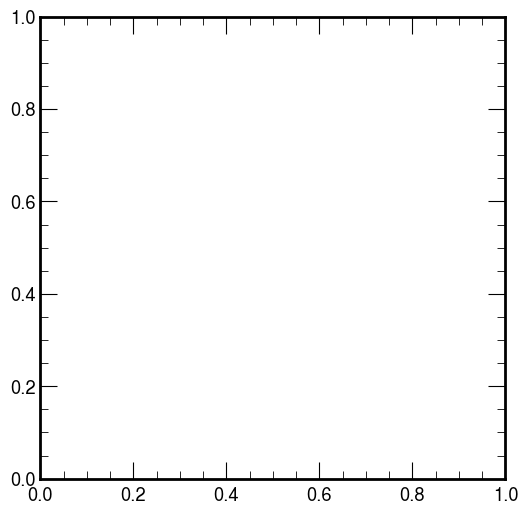

In [8]:
fig, ax = plt.subplots(figsize=(6,6))


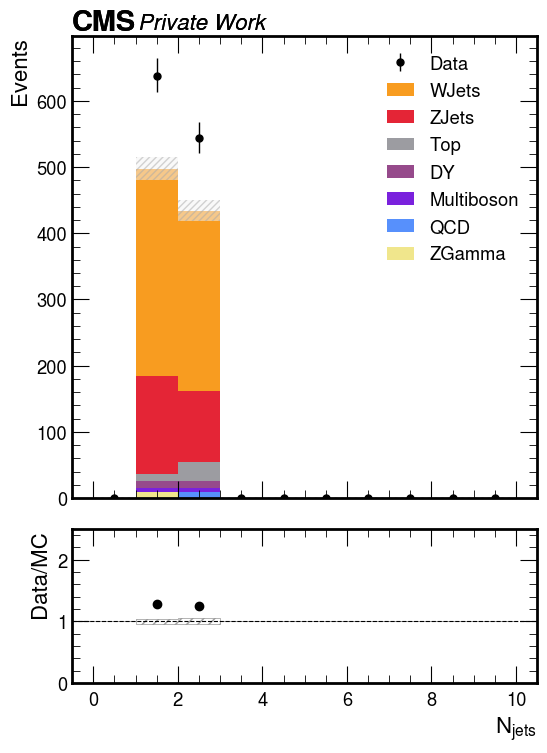

In [12]:
variable = 'nJets'
cut = 'cut11'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$N_{jets}$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Data',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./AN_Plots/{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

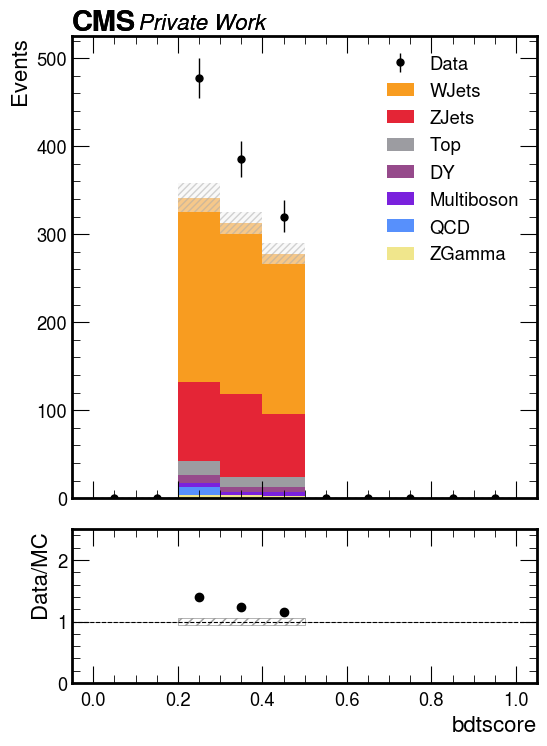

In [13]:
variable = 'bdtscore'
cut = 'cut11'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 10j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Data',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./AN_Plots/{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

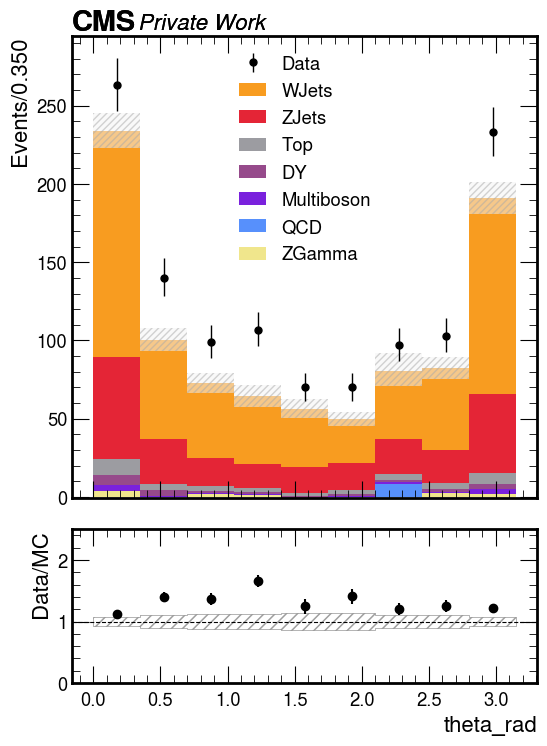

In [18]:
variable = 'sel_vtx_ThetaColl_fromPV_refit_rad'
cut = 'cut11'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 35j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Data',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./AN_Plots/{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

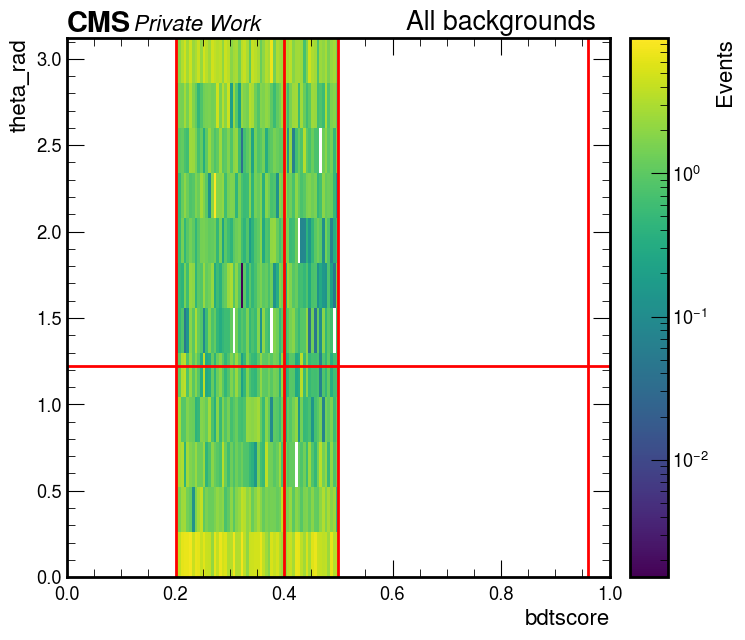

In [9]:
# Plot settings
#fig, ax = plt.subplots(figsize=(7,7))

cut = 'cut11'
variable = 'bdtscore_vs_sel_vtx_thetaColl_fromPV_refit_rad'

plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_2d_dict = {
    'fig': fig,
    'ax': ax,
    'xrebin': 5j,
    'yrebin': 26j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'zlabel': 'Events',   
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/{suffix}/data/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# Data
#ptools.plot_data_2D(data_histo, plot_dict, style_2d_dict)


# Bkg

style_2d_dict['fig'], style_2d_dict['ax'] = plt.subplots(figsize=(7,7))
ptools.plot_bkg_2D(bkg_histo, plot_dict, style_2d_dict, processes = 'all')

plt.title(rf"All backgrounds", position=(0.8, 0.5))
plt.vlines(0.2, 0, 3.15, color='red', linewidth=2)
plt.vlines(0.4, 0, 3.15, color='red', linewidth=2)
plt.vlines(0.5, 0, 3.15, color='red', linewidth=2)
plt.vlines(0.96, 0, 3.15, color='red', linewidth=2)

plt.hlines(1.22, 0, 1, color='red', linewidth=2)

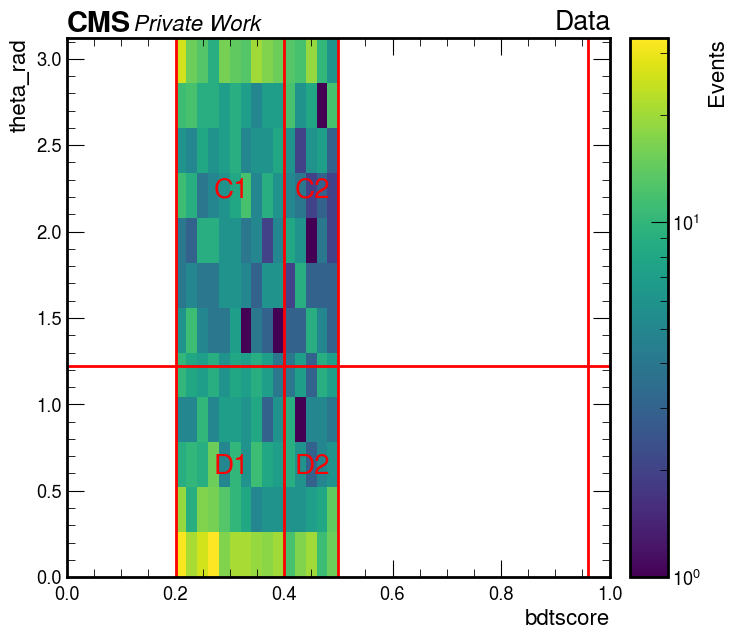

In [12]:
# Plot settings
#fig, ax = plt.subplots(figsize=(7,7))

cut = 'cut11'
variable = 'bdtscore_vs_sel_vtx_thetaColl_fromPV_refit_rad'

plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_2d_dict = {
    'fig': fig,
    'ax': ax,
    'xrebin': 20j,
    'yrebin': 26j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'zlabel': 'Events',   
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/{suffix}/data/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# Data
style_2d_dict['fig'], style_2d_dict['ax'] = plt.subplots(figsize=(7,7))

plt.title(rf"Data", position=(0.95, 0.5))

plt.vlines(0.2, 0, 3.15, color='red', linewidth=2)
plt.vlines(0.4, 0, 3.15, color='red', linewidth=2)
plt.vlines(0.5, 0, 3.15, color='red', linewidth=2)
plt.vlines(0.96, 0, 3.15, color='red', linewidth=2)

plt.hlines(1.22, 0, 1, color='red', linewidth=2)

plt.text(0.27, 2.2, 'C1', color='red', fontsize=20)
plt.text(0.27, 0.6, 'D1', color='red', fontsize=20)

plt.text(0.42, 2.2, 'C2', color='red', fontsize=20)
plt.text(0.42, 0.6, 'D2', color='red', fontsize=20)

ptools.plot_data_2D(data_histo, plot_dict, style_2d_dict)


In [13]:
run = ['data_2018_Data_MET_UL18_MET_Run2018D', \
       'data_2018_Data_MET_UL18_MET_Run2018C', \
       'data_2018_Data_MET_UL18_MET_Run2018B', \
       'data_2018_Data_MET_UL18_MET_Run2018A']

cut = 'cut11'

In [14]:
data_histo['bdtscore_vs_sel_vtx_thetaColl_fromPV_refit_rad'][{"samp":run[0], "cut": cut}][0:400,0:122]

Hist(
  Regular(400, 0, 0.4, name='bdtscore'),
  Regular(122, 0, 1.22, name='theta_rad'),
  storage=Weight()) # Sum: WeightedSum(value=298, variance=298) (WeightedSum(value=849, variance=849) with flow)

In [15]:
data_histo['bdtscore_vs_sel_vtx_thetaColl_fromPV_refit_rad'][{"samp":run[0], "cut": cut}][400:,122:]

Hist(
  Regular(600, 0.4, 1, name='bdtscore'),
  Regular(193, 1.22, 3.15, name='theta_rad'),
  storage=Weight()) # Sum: WeightedSum(value=124, variance=124) (WeightedSum(value=849, variance=849) with flow)

In [16]:
data_histo['bdtscore_vs_sel_vtx_thetaColl_fromPV_refit_rad'][{"samp":run[0], "cut": cut}][:,:122]

Hist(
  Regular(1000, 0, 1, name='bdtscore'),
  Regular(122, 0, 1.22, name='theta_rad'),
  storage=Weight()) # Sum: WeightedSum(value=400, variance=400) (WeightedSum(value=849, variance=849) with flow)

In [17]:
data_histo['bdtscore_vs_sel_vtx_thetaColl_fromPV_refit_rad'][{"samp":run[0], "cut": cut}][:,122:]

Hist(
  Regular(1000, 0, 1, name='bdtscore'),
  Regular(193, 1.22, 3.15, name='theta_rad'),
  storage=Weight()) # Sum: WeightedSum(value=449, variance=449) (WeightedSum(value=849, variance=849) with flow)

In [18]:
bdt_WP = 400
theta_WP = 122

In [19]:
nC1 = 0

for idx, era in enumerate(run):
    nC1 += data_histo['bdtscore_vs_sel_vtx_thetaColl_fromPV_refit_rad'][{"samp":run[idx], "cut": cut}][:bdt_WP,theta_WP:].sum().value
    print(era)

print(nC1)

data_2018_Data_MET_UL18_MET_Run2018D
data_2018_Data_MET_UL18_MET_Run2018C
data_2018_Data_MET_UL18_MET_Run2018B
data_2018_Data_MET_UL18_MET_Run2018A
597.0


In [20]:
nC2 = 0

for idx, era in enumerate(run):
    nC2 += data_histo['bdtscore_vs_sel_vtx_thetaColl_fromPV_refit_rad'][{"samp":run[idx], "cut": cut}][bdt_WP:,theta_WP:].sum().value
    print(era)

print(nC2)

data_2018_Data_MET_UL18_MET_Run2018D
data_2018_Data_MET_UL18_MET_Run2018C
data_2018_Data_MET_UL18_MET_Run2018B
data_2018_Data_MET_UL18_MET_Run2018A
220.0


In [21]:
nD1 = 0

for idx, era in enumerate(run):
    nD1 += data_histo['bdtscore_vs_sel_vtx_thetaColl_fromPV_refit_rad'][{"samp":run[idx], "cut": cut}][:bdt_WP,:theta_WP].sum().value
    print(era)

print(nD1)

data_2018_Data_MET_UL18_MET_Run2018D
data_2018_Data_MET_UL18_MET_Run2018C
data_2018_Data_MET_UL18_MET_Run2018B
data_2018_Data_MET_UL18_MET_Run2018A
543.0


In [22]:
nD2 = 0

for idx, era in enumerate(run):
    nD2 += data_histo['bdtscore_vs_sel_vtx_thetaColl_fromPV_refit_rad'][{"samp":run[idx], "cut": cut}][bdt_WP:,:theta_WP].sum().value
    print(era)

print(nD2)

data_2018_Data_MET_UL18_MET_Run2018D
data_2018_Data_MET_UL18_MET_Run2018C
data_2018_Data_MET_UL18_MET_Run2018B
data_2018_Data_MET_UL18_MET_Run2018A
195.0


In [23]:
pred = nD1*(nC2/nC1)
pred

200.10050251256283

In [24]:
obs = nD2
obs

195.0

In [25]:
pred_err = pred * np.sqrt((np.sqrt(nD1)/nD1)**2 + (np.sqrt(nC2)/nC2)**2 + (np.sqrt(nC1)/nC1)**2)
pred_err

17.966882549499612

In [26]:
obs_err = np.sqrt(obs)
obs_err

13.96424004376894

## Bkg

In [27]:
cut = 'cut11'

In [28]:
variable = 'bdtscore_vs_sel_vtx_thetaColl_fromPV_refit_rad'

In [ ]:
processes = list(set(utils.get_bkg_point_dict(bkg_histo).loc[:, 'Process']))
        
subprocess = {process: [] for process in processes} # initialize the dictionary of bkg processes
        
availSubCat = list(bkg_histo[variable].axes['samp']) # get the list of subprocesses available for the histogram
for samp in availSubCat:
    process = utils.get_bkg_point_dict(bkg_histo).loc[samp][0]            
    if process in processes:
        subprocess[process].append(samp) # fill out the bkg process list with the available subprocesses
            
# Get histogram for each process
bkg={}
bkg[variable] = {process:bkg_histo[variable][{"samp":subprocess[process]}][{"samp": sum}] for process in processes}
        
# sort the histograms by the entries and stack
for process in processes:
    entries = {process: bkg[variable][process].sum().value for process in processes}
        
sorted_entries = dict(sorted(entries.items(), key=lambda x:x[1], reverse = False))

bkg_stack = {}
        
# add histos to stack after rebinning and range setting
for idx, process in enumerate(sorted_entries.keys()):
    bkg[variable][process] = bkg[variable][process][cut,::1j,::1j]
        
    if idx == 0:
        bkg_stack = bkg[variable][process]
    else:
        bkg_stack += bkg[variable][process]

In [ ]:
bkg_stack

In [ ]:
bdt_WP = 400
theta_WP = 122

In [ ]:
nC1 = bkg_stack[:bdt_WP,theta_WP:].sum().value
print(nC1)

In [ ]:
nC2 = bkg_stack[bdt_WP:,theta_WP:].sum().value

print(nC2)

In [ ]:
nD1 = bkg_stack[:bdt_WP,:theta_WP].sum().value

print(nD1)

In [ ]:
nD2 = bkg_stack[bdt_WP:,:theta_WP].sum().value

print(nD2)

In [ ]:
pred = nD1*(nC2/nC1)
pred

In [ ]:
obs = nD2
obs

In [ ]:
pred_err = pred * np.sqrt((np.sqrt(nD1)/nD1)**2 + (np.sqrt(nC2)/nC2)**2 + (np.sqrt(nC1)/nC1)**2)
pred_err

In [ ]:
obs_err = np.sqrt(obs)
obs_err